# Text Analysis

The third notebook in the Parti Pris repository contains code for exploratory text analysis. We will focus on keyword searches to get a sense of the corpus and to start

## Keyword Search

Parti Pris is a unique archive for trancing the evolution of the discourses of blackness in the 1960s in Quebec. One of the important figures in this intersection is [Pierre Vallières](https://en.wikipedia.org/wiki/Pierre_Valli%C3%A8res). His *N_gres blancs d'Amérique* translated as *White N-Words of America* published in 1968, came out of the same circles as Parti Pris. His ideas on race and the struggles of French-Canadians are echoed in the pages of Parti Pris. This led us to investigate how some terms associated with this particular discourse appear in the Parti Pris corpus.

Chloé Brault's typographical approach prioritizes not reproducing the n-word despite it appearing in Vallières' title and in the Parti Pris corpus. In French, she transcribes the n-word as n_gre. We followed the same logic in our keyword search and use regular expressions. We write the n-word in all its inflected forms as `n\w{1}gre`. Here the regular expression searches for a word that starts with n followed by one letter and then gre. It serves the same function as searching for the word itself. Throughout this notebook you will see this notation in our code. We will do our best to ensure that the outputs of our text analysis, which use the actual texts from the Parti Pris, also do not display the n-word. This might not always be possible, so we appreciate your patience. 

In [2]:
import pandas as pd
import re
import matplotlib.pyplot as plt
import seaborn as sns

In [44]:
# Load the final DataFrame

df = pd.read_csv('../data/processed/partipris_final.csv')

# Display the first few rows to verify
df.head()

,source_file,title,text,author,volume,issue,year,month
0,163122_1-1964-09.json,manifeste 64-65,manifeste 64-65 Toute révolution détruit l'anc...,parti pris,2,1,1964,09
1,163122_1-1964-09.json,lettre au lecteur,lettre au lecteur parti pris se prépare à une ...,pierre maheu,2,1,1964,09
2,163122_1-1964-09.json,bilan d'un combat,bilan d'un combat paul chamberland Nous lutton...,jean-marc piotte,2,1,1964,09
3,163122_1-1964-09.json,autocritique de parti pris,autocritique de parti pris jean-marc piotte Pi...,yvon dionne,2,1,1964,09
4,163122_1-1964-09.json,notes pour une politisation,notes pour une politisation pierre maheu Dans ...,paul chamberland,2,1,1964,09


In [45]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 699 entries, 0 to 698
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   source_file  699 non-null    object
 1   title        699 non-null    object
 2   text         699 non-null    object
 3   author       699 non-null    object
 4   volume       699 non-null    int64 
 5   issue        699 non-null    object
 6   year         699 non-null    int64 
 7   month        699 non-null    object
dtypes: int64(2), object(6)
memory usage: 43.8+ KB


In [52]:
# Define keywords and regular expressions
keywords = {
    'n-word': r'n\w{1}gre',
    'n-words': r'n\w{1}gres',
    'n-word king': r'roi n\w{1}gre',
    'n-word kings': r'rois n\w{1}gres',
    # 'n-word blanc': r'n\w{1}gre blanc',
    'white n-words': r'n\w{1}gres blancs'
}

In [53]:
# First, ensure 'year' and 'month' columns are strings
df['year'] = df['year'].astype(str)
df['month'] = df['month'].astype(str)

# Split month ranges like '09-10' into lists
df['month_split'] = df['month'].str.split('-')

# Explode so each row has a single month
df_exploded = df.explode('month_split').copy()
df_exploded['month_split'] = df_exploded['month_split'].str.zfill(2)  # pad single digits

# Create a 'year_month' column
df_exploded['year_month'] = df_exploded['year'] + '-' + df_exploded['month_split']

# Now group by 'year_month' for keyword frequency
results = []
for year_month, group in df_exploded.groupby('year_month'):
    month_data = {'year_month': year_month}
    texts = group['text'].dropna().astype(str)
    for key, pattern in keywords.items():
        count = texts.apply(lambda x: len(re.findall(pattern, x, flags=re.IGNORECASE))).sum()
        month_data[key] = count
    results.append(month_data)

freq_month_df = pd.DataFrame(results).sort_values('year_month').reset_index(drop=True)
freq_month_df

,year_month,n-word,n-words,n-word king,n-word kings,white n-words
0,1963-10,2,0,1,0,0
1,1963-11,1,1,0,0,0
2,1963-12,1,0,0,0,0
3,1964-01,1,1,0,0,0
4,1964-02,1,1,0,1,0
5,1964-03,7,5,0,0,0
6,1964-04,2,1,1,1,0
7,1964-05,3,3,0,3,0
8,1964-06,4,1,0,0,0
9,1964-07,4,1,0,0,0


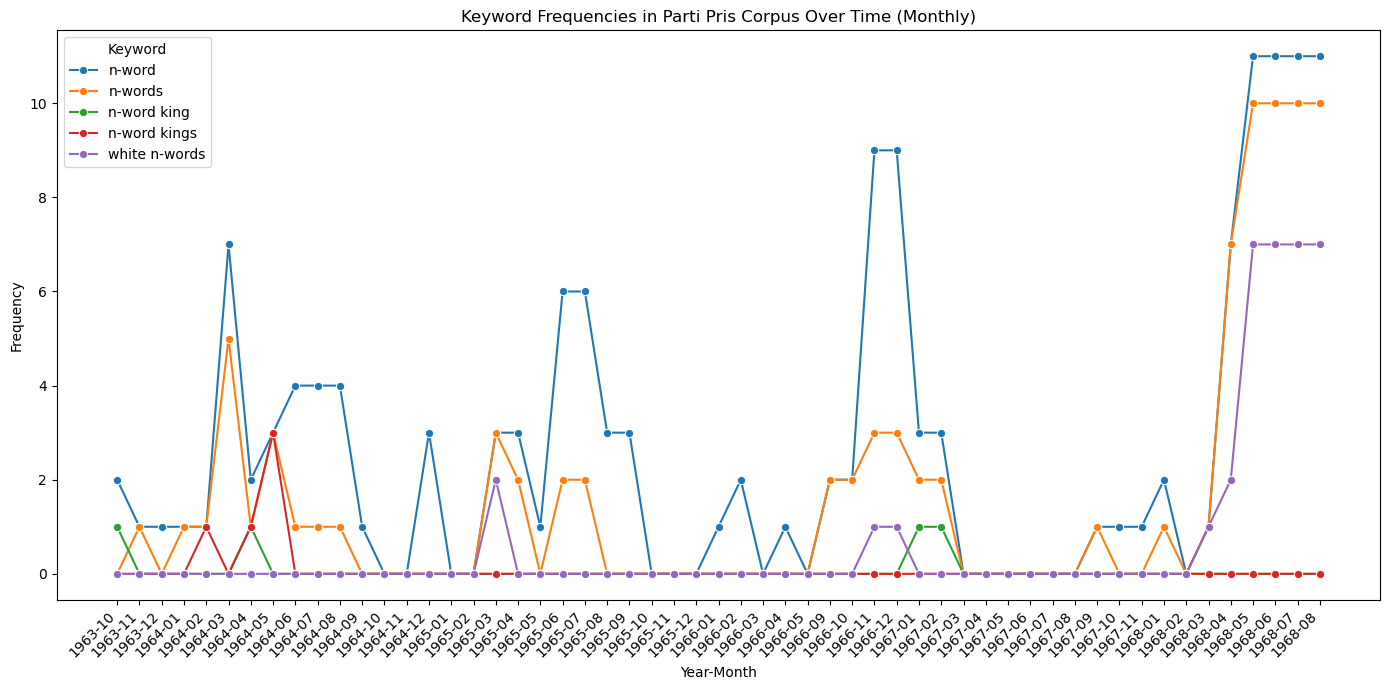

In [54]:
# Melt the DataFrame for easier plotting with seaborn
freq_melted = freq_month_df.melt(id_vars='year_month', var_name='keyword', value_name='frequency')

plt.figure(figsize=(14, 7))
sns.lineplot(
    data=freq_melted,
    x='year_month',
    y='frequency',
    hue='keyword',
    marker='o'
)

plt.xlabel('Year-Month')
plt.ylabel('Frequency')
plt.title('Keyword Frequencies in Parti Pris Corpus Over Time (Monthly)')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Keyword')
plt.tight_layout()
plt.show()

In [55]:
# Sum total appearances of each keyword across all months
total_counts = freq_month_df.drop(columns='year_month').sum().sort_values(ascending=False)
print(total_counts)

n-word           148
n-words           88
white n-words     35
n-word kings       5
n-word king        4
dtype: int64


In [56]:
# Sum total appearances of each keyword across all months
total_counts = freq_month_df.drop(columns='year_month').sum().sort_values(ascending=False)
print(total_counts)

n-word           148
n-words           88
white n-words     35
n-word kings       5
n-word king        4
dtype: int64


## Side Quest: May 1965

We know that the May 1965 issue was an important one for exploring the topics related to race. The subtitle of that issue was *Québec, capitale de roi-n_gre* which was surprising considering that the keyword did not appear in this issue. 

Let's investigate this further!

In [57]:
# Specify the issue you want to analyze
issue_year = "1965"
issue_month = "05"  # use two digits

# Filter for the specific issue
issue_df = df_exploded[
    (df_exploded['year'] == issue_year) &
    (df_exploded['month_split'] == issue_month)
]

# Count keywords in this issue
issue_counts = {}
texts = issue_df['text'].dropna().astype(str)
for key, pattern in keywords.items():
    count = texts.apply(lambda x: len(re.findall(pattern, x, flags=re.IGNORECASE))).sum()
    issue_counts[key] = count

print(f"Keyword counts for {issue_year}-{issue_month}:")
print(issue_counts)

Keyword counts for 1965-05:
{'n-word': 1, 'n-words': 0, 'n-word king': 0, 'n-word kings': 0, 'white n-words': 0}


### Missing Page

Searching for these keywords allowed us to discover that one page of 1965-05 was not transcribed. It does not necessarily look like an article and it was not listed on the table of contents. However, it is one of the pieces in this corpus that is a part of the discourses on blackness. We will extract the text and add this to the final version.

<figure>
    <img src="../img/1965-05_n-word_king.png"
         alt="Page 60 of the May 1965 issue">
    <figcaption>Screenshot of the missing page. The removed squares on the image redact the words 'roi n_gre` (n-word king).</figcaption>
</figure>

In [ ]:
missing_row = {
    'source_file': '163122_1-1965-05.json', 
    'title': 'roi nègre du type taxo-vulgaris',
    'text': """La photographie ci-contre est celle d'une statuette de la tribu des Teke, au Congo Occidental. Nous croyons savoir qu'elle représente un roinègre, traître à sa nation, qui y vécut autrefois. On en fait une figure fétiche pour s'en protéger, car il revient hanter les humains et les persécuter par toutes sortes de taxes et de vexations diverses. Remarquez le symbolisme très riche du poignard (sorte de croc à phynances) tenu dans la main droite, et de la crête de coq, attribut de la fatuité et de l'irascibilité. Enfin, comme Oedipe, il a les pieds brisés, parce qu'il couche avec sa mère qui est à Ottawa. Les indigènes le surnomment familièrement Ti-Jean la Taxe. (Reproduit de: L'Art primitif de Douglas Fraser, Editions Aimery Somogy, Paris, page 60)""",
    'author': 'parti pris',
    'volume': 2,
    'issue': '09',
    'year': 1965,
    'month': '05'
}

In [15]:
# Append to DataFrame
df = pd.concat([df, pd.DataFrame([missing_row])], ignore_index=True)

df.drop(columns=['month_split'], inplace=True)  # Clean up temporary month split column

# Save updated DataFrame
df.to_csv('../data/processed/partipris_final.csv', index=False)

> if you are running this code in order, you will need to rerun the month_split code above to reassign the month_split values and apply the necessary changes to the df to be able to do frequency analysis.

This also led us to realize three things:
- our keyword search was not as robust, so we are not matching the differences in spelling, i.e. is there a - or space or even no space between words.
- we need to take titles into account
- while the May 1965 issue has the keyword in the subtitle of the issue, the body of the text, except for the one missing page, does not actually contain the n-word or n-word king.

## Keyword Search Take 2

In [ ]:
# let's update our keywords first

keywords_v2 = {
    'n-word': r'n\w{1}gre',
    'n-words': r'n\w{1}gres',
    'n-word king': r'roi(?: ?-?)n\w{1}gre',
    'n-word kings': r'rois(?: ?-?)n\w{1}gres',
    'white n-words': r'n\w{1}gres(?: ?-?)blancs'
}

In [59]:
# redo the frequency analysis with the updated keywords and with the titles included

# Redo the month_split and explode in case the DataFrame has changed
df['year'] = df['year'].astype(str)
df['month'] = df['month'].astype(str)
df['month_split'] = df['month'].str.split('-')
df_exploded = df.explode('month_split').copy()
df_exploded['month_split'] = df_exploded['month_split'].str.zfill(2)
df_exploded['year_month'] = df_exploded['year'] + '-' + df_exploded['month_split']

# Use keywords_v2 for the new frequency analysis (do not override keywords)
results = []
for year_month, group in df_exploded.groupby('year_month'):
    month_data = {'year_month': year_month}
    texts = (group['title'].fillna('') + ' ' + group['text'].fillna('')).astype(str)
    for key, pattern in keywords_v2.items():
        count = texts.apply(lambda x: len(re.findall(pattern, x, flags=re.IGNORECASE))).sum()
        month_data[key] = count
    results.append(month_data)

freq_month_df_v2 = pd.DataFrame(results).sort_values('year_month').reset_index(drop=True)
freq_month_df_v2


,year_month,n-word,n-word(plural),n-word king,n-word kings,white n-words
0,1963-10,2,0,1,0,0
1,1963-11,1,1,0,0,0
2,1963-12,1,0,0,0,0
3,1964-01,1,1,0,0,0
4,1964-02,1,1,0,1,0
5,1964-03,7,5,0,0,1
6,1964-04,2,1,1,1,0
7,1964-05,3,3,0,3,0
8,1964-06,4,1,0,1,0
9,1964-07,4,1,0,1,0


In [60]:
# Sum total appearances of each keyword across all months using the new DataFrame
total_counts_v2 = freq_month_df_v2.drop(columns='year_month').sum().sort_values(ascending=False)
print(total_counts_v2)

n-word            154
n-word(plural)     93
white n-words      41
n-word kings       18
n-word king        15
dtype: int64


In [36]:
# Let's look at the May 1965 issue again
issue_year = "1965"
issue_month = "05"

may65_df = df_exploded[
    (df_exploded['year'] == issue_year) &
    (df_exploded['month_split'] == issue_month)
]

may65_texts = (may65_df['title'].fillna('') + ' ' + may65_df['text'].fillna('')).astype(str)

may65_counts = {}
for key, pattern in keywords_v2.items():
    count = may65_texts.apply(lambda x: len(re.findall(pattern, x, flags=re.IGNORECASE))).sum()
    may65_counts[key] = count

print(f"Keyword counts for May 1965:")
print(may65_counts)

Keyword counts for May 1965:
{'n-word': 2, 'n-word(plural)': 0, 'n-word king': 2, 'n-word kings': 0, 'white n-words': 0}


In [61]:
window = 30  # number of characters before and after the match

for key, pattern in keywords_v2.items():
    found = False
    for idx, text in enumerate(may65_texts):
        for match in re.finditer(pattern, text, flags=re.IGNORECASE):
            found = True
            start, end = match.span()
            context = (
                text[max(0, start-window):start] +
                f'[{key}]' +
                text[end:end+window]
            )
            print(f"Row {may65_df.index[idx]}: ...{context}...")
    if found:
        print(f"\nContexts for '{key}' in May 1965 above.\n")

Row 698: ...roi [n-word] du type taxo-vulgaris La phot...
Row 698: ...voir qu'elle représente un roi[n-word], traître à sa nation, qui y v...

Contexts for 'n-word' in May 1965 above.

Row 698: ...[n-word king] du type taxo-vulgaris La phot...
Row 698: ... savoir qu'elle représente un [n-word king], traître à sa nation, qui y v...

Contexts for 'n-word king' in May 1965 above.



We seem to be also double counting keywords. This happens when we combine unigrams and bigrams like this. 

In [63]:
# let's update our keywords to prevent double counting (order matters: more specific first)
keywords_v3 = {
    'n-word kings': r'rois(?: ?-?)n\w{1}gres',
    'n-word king': r'roi(?: ?-?)n\w{1}gre',
    'white n-words': r'n\w{1}gres(?: ?-?)blancs',
    'n-words': r'\bn\w{1}gres\b',
    'n-word': r'\bn\w{1}gre\b'
}

In [64]:
# redo the frequency analysis with the updated keywords (v3) and with the titles included

# Redo the month_split and explode in case the DataFrame has changed
df['year'] = df['year'].astype(str)
df['month'] = df['month'].astype(str)
df['month_split'] = df['month'].str.split('-')
df_exploded = df.explode('month_split').copy()
df_exploded['month_split'] = df_exploded['month_split'].str.zfill(2)
df_exploded['year_month'] = df_exploded['year'] + '-' + df_exploded['month_split']

# Use keywords_v3 for the new frequency analysis (do not override keywords)
results = []
for year_month, group in df_exploded.groupby('year_month'):
    month_data = {'year_month': year_month}
    texts = (group['title'].fillna('') + ' ' + group['text'].fillna('')).astype(str)
    for key, pattern in keywords_v3.items():
        count = texts.apply(lambda x: len(re.findall(pattern, x, flags=re.IGNORECASE))).sum()
        month_data[key] = count
    results.append(month_data)

freq_month_df_v3 = pd.DataFrame(results).sort_values('year_month').reset_index(drop=True)
freq_month_df_v3

,year_month,n-word kings,n-word king,white n-words,n-words,n-word
0,1963-10,0,1,0,0,1
1,1963-11,0,0,0,0,0
2,1963-12,0,0,0,0,1
3,1964-01,0,0,0,1,0
4,1964-02,1,0,0,1,0
5,1964-03,0,0,1,4,2
6,1964-04,1,1,0,1,1
7,1964-05,3,0,0,3,0
8,1964-06,1,0,0,1,0
9,1964-07,1,0,0,1,0


In [66]:
# Sum total appearances of each keyword across all months using the new DataFrame
total_counts_v3 = freq_month_df_v3.drop(columns='year_month').sum().sort_values(ascending=False)
print(total_counts_v3)

n-words          84
white n-words    41
n-word           31
n-word kings     18
n-word king      15
dtype: int64


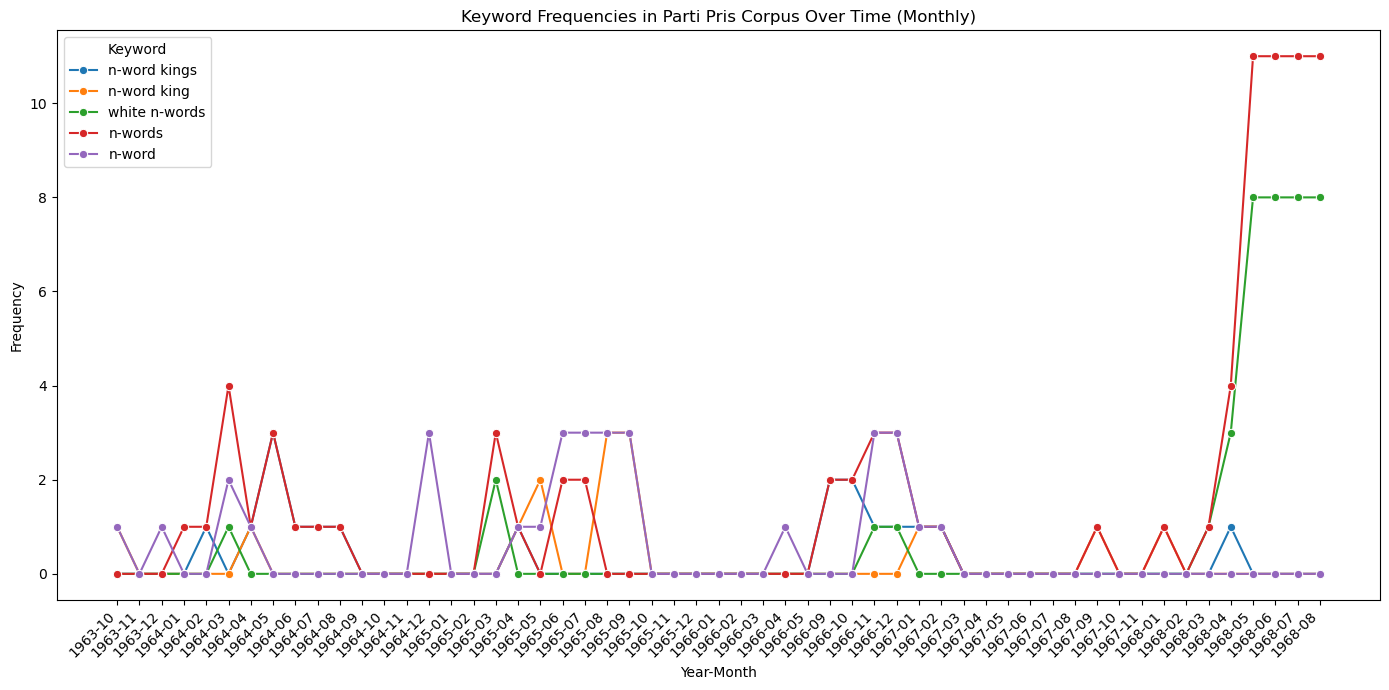

In [65]:
# Let's visualize this new frequency DataFrame
freq_melted_v3 = freq_month_df_v3.melt(id_vars='year_month', var_name='keyword', value_name='frequency')
plt.figure(figsize=(14, 7))
sns.lineplot(
    data=freq_melted_v3,
    x='year_month',
    y='frequency',
    hue='keyword',
    marker='o'
)
plt.xlabel('Year-Month')
plt.ylabel('Frequency')
plt.title('Keyword Frequencies in Parti Pris Corpus Over Time (Monthly)')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Keyword')
plt.tight_layout()
plt.show()